In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train_titanic.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

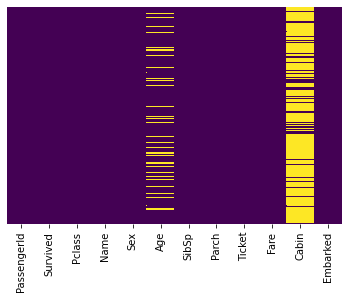

In [5]:
#Null values ne aaode heatmap ma draw karisu[andar je condition aapisu heatmap ma aena mate True hase ae vastu draw thase]

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis') #y-axis par koi j label show nai kare

#aana upar thi ae khabar pade ke 'Age' and 'Cabin' column ma null values che[All the NaN values shown in yellow colour]

# Let's understand data more close

<AxesSubplot:xlabel='Survived', ylabel='count'>

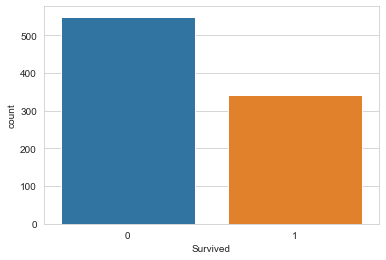

In [6]:
#we will create a countplot to count different things from the dataset

sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train) #aapde 'Survived' vala feature count karisu(0 denote thay matlab survive nai kari sakya and 1 denote thay aetle ke ae survive kari sakya che)

<AxesSubplot:xlabel='Survived', ylabel='count'>

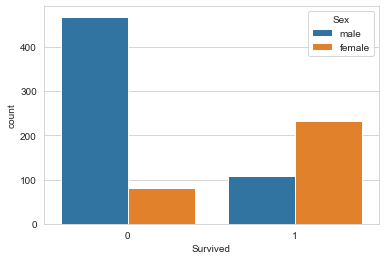

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train) #sex ne dependent ketla survive kari sakya che matlab ke ketla male and ketla female survive kari sakya che aeno count

<AxesSubplot:xlabel='Survived', ylabel='count'>

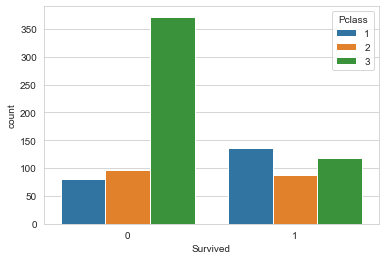

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train) #aama aapde 'Pclass' aetle ke passenger class ne regarding joisu ke kaya class vala loko ma ketla bachya hata

### aapadne khabar pade che upar na graph par thi ke 'Pclass' jeno vadhare hoy ae vadhare bachya hata and ochha marya hata

##### 'Titanic' ma ketli-ketli age vala hata ae and aapda dataset ma age nu distribution kai ritnu che ae joisu - with the help of distplot

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

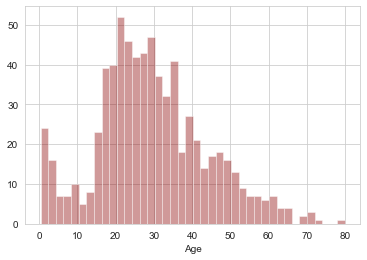

In [9]:
sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=40) #age vala feature ma aapda dataset ma ghani value ma NaN che ae to NaN vala ne aapde drop kari ne draw karisu 
#kde=False rakhyo kem ke aapde atyare kde ni jarur nahi khali distribution j jovanu che aapde age nu

#### upar je vastu kari ne Seaborn ni help thi kari have aej vastu aapde matplotlib thi karvi hoy to aena mate

<AxesSubplot:>

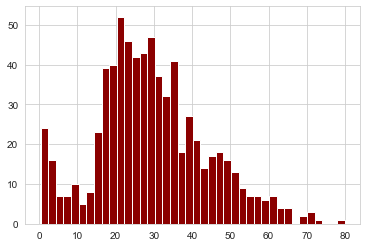

In [10]:
train['Age'].hist(bins=40, color='darkred')

### have aapde count draw karisu siblings and spouses mate ke jethi aapde count kari sakie siblings and spouses 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

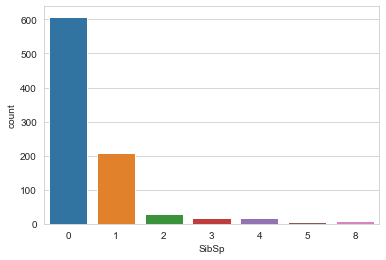

In [11]:
sns.countplot(x='SibSp', data=train)

###### upar no graph joi ne aapadne khabar pade ke maximum loko aeva che ke jemne koi siblings or spouses nahi

# DATA CLEANING

### upar aapde joyu ke 2 columns(Age, Cabin) aeva che ke je contains null values

#### aapde pela age column mathi NaN values remove karisu pan aena pela aapde age and Pclass vachhe no relation joisu ke suppose class-1 ma average age kai che

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

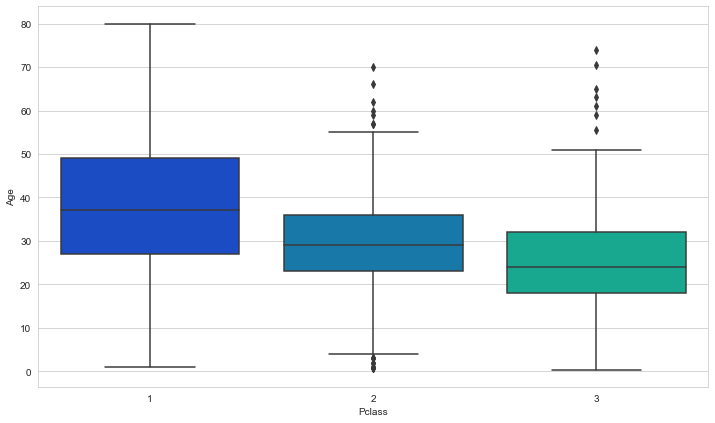

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

##### upar na graph parthi aapadne khabar pade che ke vadhare age vala je che aemno class-1 che and jem jem age ghatti jay aem aem class ghatta jay che

## Have aapde Pclass parthi aene according je Age column che ae bharu suppose class=1 hoy and aema age column null hoy to upar class-1 mate je average value mali ae mukisu same aapde class-2&3 ma bi karisu

In [13]:
# AA FUNCTION THI AAPDA DATASET MA JE Age VALI COLUMNS KHALI HASE NE AE FILL THAI JASE AENE ACCORDING CLASS NE AADHARE

def impute_age(col): #aapda function ne aapde columns aapie chie aema 1st columns hase Age and second column hase Pclass
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age): #aapde condition muki ke jo Age column null hoy to AND
        if Pclass == 1: # aeno pasenger class 1 hoy to
            return 37 #aema age 37 return karvani
        elif Pclass == 2:
            return 29
        else: 
            return 24
    else:              # and jo Age column null na hoy to aema je Age hoy ae ni ae return karvani
        return Age

upar je function banayu aene aapde aapda dataset na Age and Pclass naam na columns ne apply karisu

In [14]:
# TO APPLY THE FUNCTION CREATED ABOVE
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1) #train name na dataset ma Age name na column ma aapde je function banayu ae apply kari do aevo command aapyo
#and train['Age', 'Pclass'] aetle ke dataset na jetla columns ne use ma lai ne aapde function lagu padvanu hoy ne aetla columns mention karvana hoy

<AxesSubplot:>

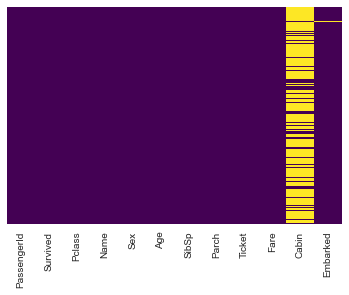

In [15]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

dataset ma function apply karya pachi heatmap check karie to age column ma aek bi null value na jova male kem ke aeni badhi j null values ne aapde banayela function ne aadhare fill kari didhi

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Have aapde bijo je null values dharavto column che 'Cabin' aena mate process karisu upar jevi 'Age' vala mate kari aevi

Problem ae che ke 'Cabin' ma bau badhi null values che - null values ni sankhya value valli row ni sankhya karta ochi che to aapde null values ne badle feature engineering no use kari ne kai nakhva jaie aena karta ae column j drop kari devu saru

In [17]:
train.drop('Cabin', inplace=True, axis=1)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

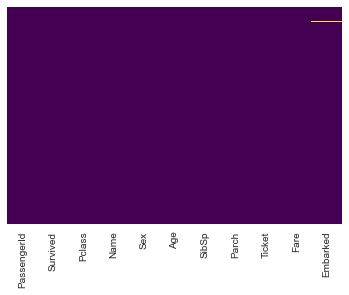

In [19]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

upar na graph par thi joi sakie chie ke aapda badha j columns mathi null values nikli gai che

# aapda dataset ma je cateforical features che(numbers na hoy, yes-no ke aevu kai present karta hoy aeva) to aena mate aapde aemne integer ma convert karisu

sauthi last vala ma P-Q-S aem 3 categorical vastuo che to aapde ae aek column ne badle 2 seperate columns banaisu ke jema q=1 and s=0 hoy to aema q cosider karvama aavse, q=0 and s=1 hoy to aena mate s consider karva ma aavse and banne 0 hoy to C consider karva ma aavse

In [56]:
# 'Embarked' function nu dummy lavva mate niche karyu aem karvanu
pd.get_dummies(train['Embarked'], drop_first=True) #drop first aetle 'C' valu jatu rese and aena badle Q & S add thai jase

KeyError: 'Embarked'

In [23]:
# Sex and Embarked banne columns ne badle aapde dummy fearures variables banai didha che to have aapde ae banne columns ne drop kari ne niche je 2 columns banaisu Sex and Embarked ne badle ae banne add kari daisu aapda dataset ma
Sex = pd.get_dummies(train['Sex'], drop_first=True)
Embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [25]:
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500


In [66]:
#aapde remove kari didhi 'Sex' and 'Embarked' columns have aapde aena badle je biji 2 banai aene add karvani to aena mate

train = pd.concat([train, Sex, Embarked], axis=1) #train data ma 'Sex' and 'Emabarked' ae banne columns add kari do aevo command aapyo

In [67]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


upar 'male' column ma 1 hoy to male and 0 hoy to female
  

Q = 1 toh Q | S = 1 toh S | banne Q & S = 0 toh C

### have aapde important nahi aeva features jeva ke 'Name' and 'PassengerId' bi drop kari daisu

In [53]:
train.drop(['PassengerId', 'Name'], axis=1, inplace=True) #inplace=True karvathi original je dataset hoy aema bi changes thai jay

KeyError: "['PassengerId' 'Name'] not found in axis"

In [54]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [35]:
train.drop(['Ticket'], axis=1, inplace=True)

In [36]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# BUILDING A LOGISTIC REGRESSION MODEL

## Train - Test spliting

In [40]:
# independent variables ae badha features thase and dependent variable(ke je mellavanu hoy, predict karavanu hoy) ae labels thase

train.drop(['Survived'], axis=1)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


upar je che ae aapda independent variables thase ke jeni madad thi aapde prediction karvanu che

In [42]:
train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

upar je che ae aapda dependent variables thase ke je predict karvana che

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train.drop(['Survived'], axis=1), train['Survived'], test_size=0.30, random_state=101)
#total dataset na 30% aapde test_data ma split karya and 70% train_data ma

# TRAINING AND PREDICTING

In [44]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

c:\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
predictions = logreg.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
accuracy = confusion_matrix(y_test, predictions)

In [48]:
accuracy

array([[133,  21],
       [ 38,  76]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy = accuracy_score(y_test, predictions)

In [51]:
accuracy

0.7798507462686567

Just simple logistic regression apply kari ne aapadne 77.98% accuracy mali complex models no use karie to vadhare saru accuracy male aapadne like random_forest_classifier ne ae badha